### Part of EECS 6893 - Big Data Analytics - Fall 2021 - Final Project 

* Group ID:- 202112-53
* Title:- Assaying MSD
* Contributors:- Karpagam Murugappan; Arya Kasulla

Analyzing data extracted from MSD

In [ ]:
! pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-3lk8_o3_
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-3lk8_o3_
     |████████████████████████████████| 15.4 MB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 39.0 MB/s 
  Created wheel for geopandas: filename=geopandas-0.10.2+16.gee8adfb-py2.py3-none-any.whl size=1031775 sha256=7ec003f183d4e01d45d389a2d3fc614ccca61a3a4910e4fc29e6e694f54505a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-dzwa63fr/wheels/cf/3e/0b/6475054094c2b1ea054158ac1fdcf749fb92f5b512377e4cf8
Successfully built geopandas


In [ ]:
! pip install plotly

In [ ]:
import pandas as pd
import numpy as np
import os
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.graph_objects as go
import plotly.express as px
from sklearn.manifold import TSNE
import random

In [ ]:
'''
Read the csv file created earlier by extracting information from the H5 files
'''
#df=pd.read_csv(os.getcwd()+"/data/SOURCE-DATASET-1.csv")
df=pd.read_csv("/content/SOURCE-DATASET-1.csv")

In [ ]:
#Columns present
df.columns

Index(['ARTIST_7DIGITALID', 'ARTIST_FAMILIARITY', 'ARTIST_HOTTTNESSS',
       'ARTIST_ID', 'ARTIST_LATITUDE', 'ARTIST_LOCATION', 'ARTIST_LONGITUDE',
       'ARTIST_MBID', 'ARTIST_NAME', 'ARTIST_PLAYMEID', 'AUDIO_MD5',
       'BARS_START', 'BEATS_START', 'DURATION', 'END_OF_FADE_IN', 'INDEX',
       'LOUDNESS', 'NUM_SONGS', 'RELEASE', 'RELEASE_7DIGITALID',
       'SEGMENTS_START', 'SEGMENT_LOUDNESS_MAX', 'SEGMENT_PITCHES',
       'SEGMENT_TIMBRE', 'SIMILAR_ARTISTS', 'SONG_HOTTTNESSS', 'SONG_ID',
       'START_OF_FADE_OUT', 'TATUMS_START', 'TEMPO', 'TITLE',
       'TRACK_7DIGITALID', 'YEAR'],
      dtype='object')

In [ ]:
#NUM_SONGS ALWAYS HAD NAN - remove the column - each h5 file points to a single track
df = df.drop(columns=['NUM_SONGS'])

In [ ]:
'''
Pearson's coefficient - default parameter for corr()
'''
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,ARTIST_7DIGITALID,ARTIST_FAMILIARITY,ARTIST_HOTTTNESSS,ARTIST_LATITUDE,ARTIST_LONGITUDE,ARTIST_PLAYMEID,DURATION,END_OF_FADE_IN,INDEX,LOUDNESS,RELEASE_7DIGITALID,SONG_HOTTTNESSS,START_OF_FADE_OUT,TEMPO,TRACK_7DIGITALID,YEAR
ARTIST_7DIGITALID,1.000000,-0.421720,-0.410276,-0.000293,0.056524,-0.003251,0.014015,-0.011502,-0.001695,0.026042,0.388553,-0.228219,0.015797,0.030455,0.387477,-0.185319
ARTIST_FAMILIARITY,-0.421720,1.000000,0.807902,0.014572,-0.011616,-0.115103,0.045423,-0.000869,-0.017158,0.219108,-0.153160,0.522318,0.044283,0.052236,-0.150330,0.395425
ARTIST_HOTTTNESSS,-0.410276,0.807902,1.000000,-0.012283,0.007611,-0.096925,0.014120,-0.007473,-0.014770,0.186050,-0.127124,0.500159,0.013289,0.063723,-0.124179,0.373728
ARTIST_LATITUDE,-0.000293,0.014572,-0.012283,1.000000,0.083464,-0.006274,0.015446,0.061091,0.027811,0.038219,-0.031210,0.056166,0.014792,-0.078702,-0.030378,-0.008944
ARTIST_LONGITUDE,0.056524,-0.011616,0.007611,0.083464,1.000000,-0.000365,0.089529,0.085703,0.002817,0.016368,-0.006794,-0.043316,0.090087,0.001170,-0.005200,0.035715
ARTIST_PLAYMEID,-0.003251,-0.115103,-0.096925,-0.006274,-0.000365,1.000000,-0.022978,0.016762,-0.005584,-0.039486,0.025351,-0.073680,-0.022915,-0.001576,0.024900,-0.079307
DURATION,0.014015,0.045423,0.014120,0.015446,0.089529,-0.022978,1.000000,0.101708,-0.007423,0.078410,-0.007882,-0.015119,0.998590,-0.013963,-0.007318,0.012180
END_OF_FADE_IN,-0.011502,-0.000869,-0.007473,0.061091,0.085703,0.016762,0.101708,1.000000,0.009351,-0.087701,-0.061188,0.007383,0.096380,-0.012864,-0.061107,0.030760
INDEX,-0.001695,-0.017158,-0.014770,0.027811,0.002817,-0.005584,-0.007423,0.009351,1.000000,-0.022108,-0.014961,-0.031100,-0.007638,-0.014795,-0.014261,-0.032245
LOUDNESS,0.026042,0.219108,0.186050,0.038219,0.016368,-0.039486,0.078410,-0.087701,-0.022108,1.000000,0.039381,0.215085,0.083490,0.180287,0.039662,0.142818


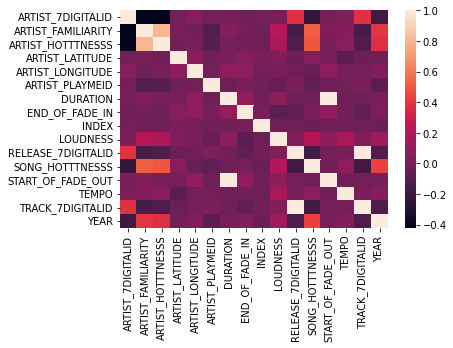

In [ ]:
#show it as heatmap
sns.heatmap(df.corr()) #default Pearson

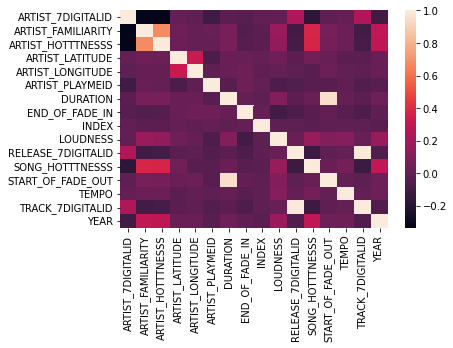

In [ ]:
# Use Kendall's correlation coefficient and display it as heatmap
sns.heatmap(df.corr('kendall'))

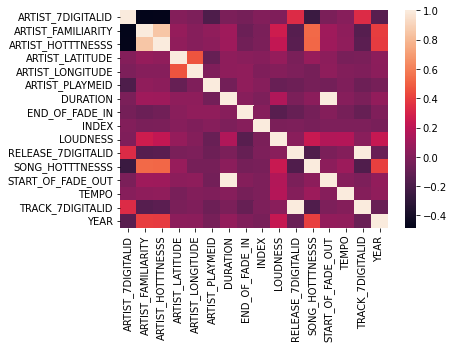

In [ ]:
# Use Spearman's coefficient and display it as heatmap
sns.heatmap(df.corr('spearman'))

#### Trying to see if regression can work between any of the features and year (part of year prediction) - using regplot provided by seaborn

(1920.0, 2011.0)

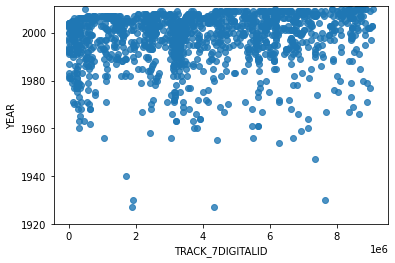

In [ ]:
#Check if f(TRACK_7DIGITALID) = YEAR works
sns.regplot(x=df["TRACK_7DIGITALID"], y=df["YEAR"],fit_reg=True)
plt.ylim(1920,2011)

ARTIST_7DIGITALID


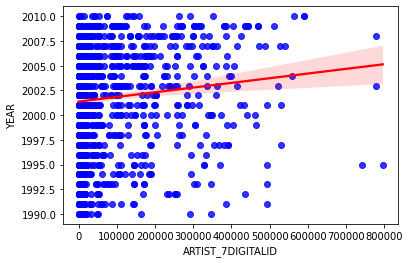

ARTIST_FAMILIARITY


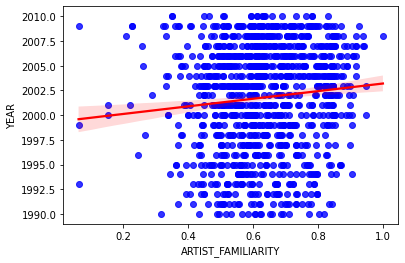

ARTIST_HOTTTNESSS


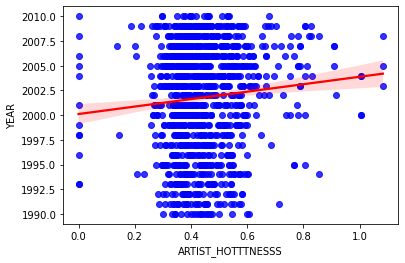

ARTIST_LATITUDE


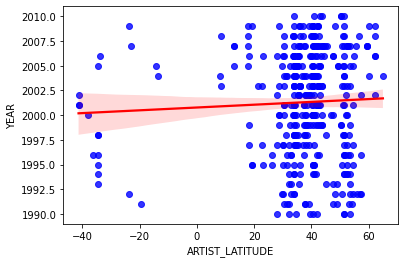

ARTIST_LONGITUDE


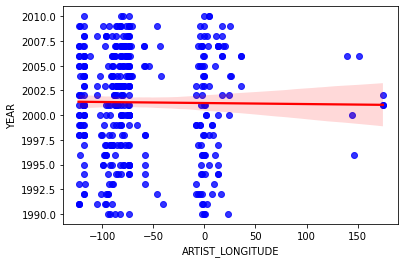

ARTIST_PLAYMEID


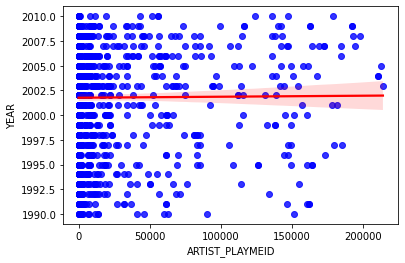

DURATION


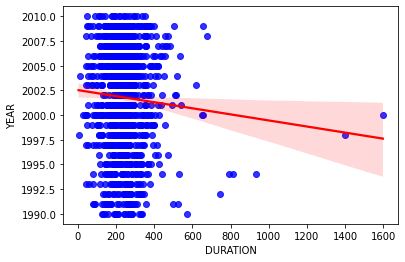

END_OF_FADE_IN


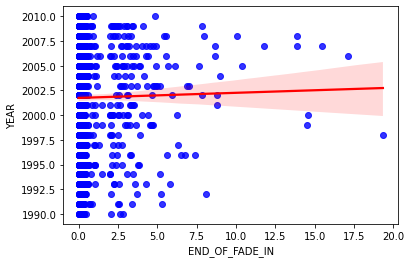

INDEX


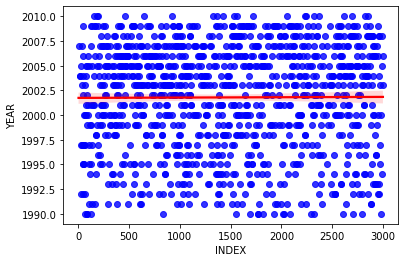

LOUDNESS


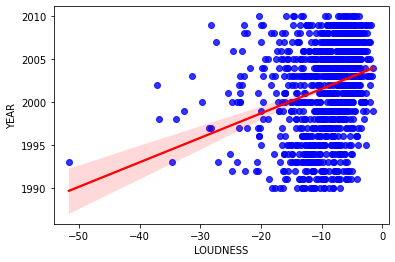

RELEASE_7DIGITALID


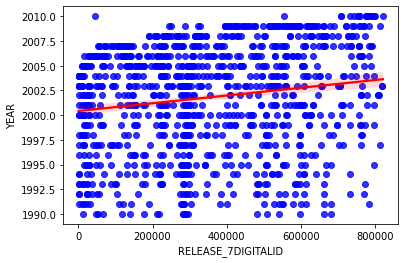

SONG_HOTTTNESSS


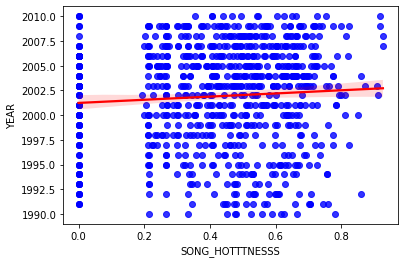

START_OF_FADE_OUT


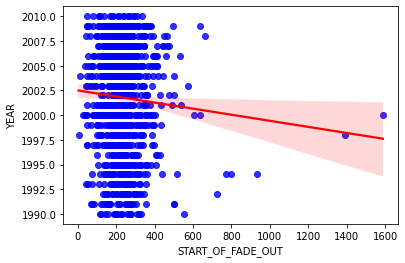

TEMPO


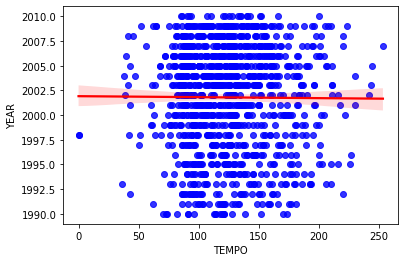

TRACK_7DIGITALID


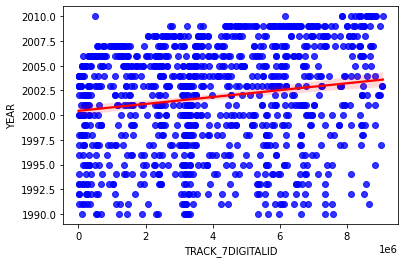

YEAR


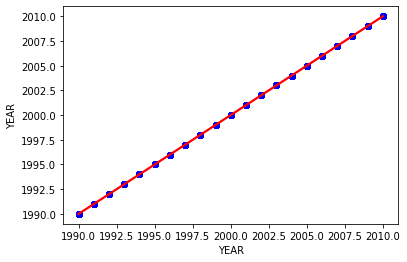

In [ ]:
tmpdf1 = df.loc[df['YEAR']>= 1990] #Only years between 1990 to 2011 have good number of tracks
#remaining years have comparitively sparser data
for c in tmpdf1.columns:
    #The columns stated in the if clause are attributes with
    #with values in string format or vector format - needs processing before using for regression
    if c=='ARTIST_ID' or c=='TATUMS_START' or c=='TITLE' \
    or c=='ARTIST_LOCATION' or c=='SONG_ID' or c=='SEGMENT_PITCHES' \
    or c=='SEGMENT_TIMBRE' or c=='SIMILAR_ARTISTS' or c=='RELEASE' \
    or c=='SEGMENT_LOUDNESS_MAX' or c=='SEGMENTS_START' or c=='ARTIST_MBID' \
    or c=='ARTIST_NAME' or c=='AUDIO_MD5' or c=='BARS_START' or c=='BEATS_START':
        continue
    print(c)
    sns.regplot(x=tmpdf1[c],y=tmpdf1["YEAR"],scatter_kws={"color": "blue"}, line_kws={"color": "red"})
    plt.show()

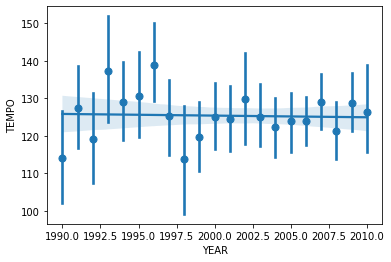

In [ ]:
#Check if f(TEMPO)=YEAR works
sns.regplot(x=tmpdf1["YEAR"] , y=tmpdf1["TEMPO"],x_bins=100)

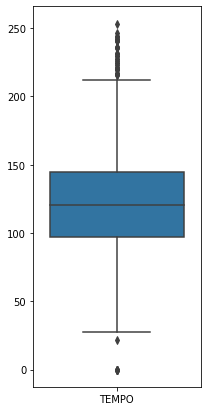

In [ ]:
#Check the range, mean, quartile values of TEMPO attribute across all years
#Helps us to understand how close the values we are dealing with are
plt.figure(figsize=(3,7))
sns.boxplot(data=df[['TEMPO']])

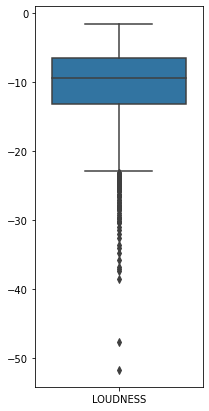

In [ ]:
#Check the range, mean, quartile values of LOUDNESS attribute across all years
#Helps us to understand how close the values we are dealing with are
plt.figure(figsize=(3,7))
sns.boxplot(data=df[['LOUDNESS']])

[Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010')]

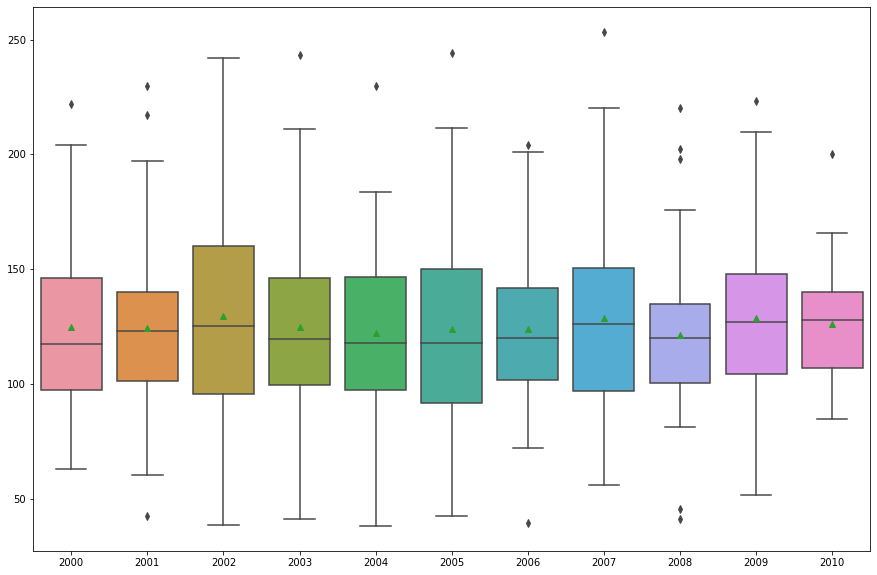

In [ ]:
#Check the range, mean, quartile values of TEMPO attribute year wise from 2000 to 2010 - range with max # tracks
#Helps us to understand how close the values we are dealing with are
plt.figure(figsize=(15,10))
dff = []
yrs= []
for t in range(11):
    yr = 2000+t
    yrs.append(yr)
    dff.append(list(df.loc[df['YEAR']==yr]['TEMPO']))

g = sns.boxplot(data=dff, showfliers=True,showmeans=True)
g.set_xticklabels(yrs)

In [ ]:
#Working on the geographic information
fig = px.scatter_geo(df,lat='ARTIST_LATITUDE',lon='ARTIST_LONGITUDE')
fig.update_layout(title = 'ARTIST LOCATION', title_x=0.5)
fig.show()

In [ ]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['ARTIST_LONGITUDE'],
        lat = df['ARTIST_LATITUDE'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'star',
            line = dict(
                width=1,
                color='red'
            ),
        )))

fig.update_layout(
        title = 'ARTIST GEOGRAPHICS',
    )
fig.show()

#### Dimensionality reduction

In [ ]:
# Condense each artist tag into just one entry
tydf = df.copy()
tydf = tydf.loc[tydf['YEAR'] >=2000] #2000 to 2011 - years with max # tracks
x_categories = list(tydf.columns)
y_category = 'YEAR'
x_categories.remove(y_category)
for c in df.columns:
    if c!='YEAR':
        if str(type(tydf.iloc[0][c]))=="<class 'str'>":
            x_categories.remove(c)

In [ ]:
x_categories

['ARTIST_7DIGITALID',
 'ARTIST_FAMILIARITY',
 'ARTIST_HOTTTNESSS',
 'ARTIST_LATITUDE',
 'ARTIST_LONGITUDE',
 'ARTIST_PLAYMEID',
 'DURATION',
 'END_OF_FADE_IN',
 'INDEX',
 'LOUDNESS',
 'RELEASE_7DIGITALID',
 'SONG_HOTTTNESSS',
 'START_OF_FADE_OUT',
 'TEMPO',
 'TRACK_7DIGITALID']

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 774 samples in 0.007s...
[t-SNE] Computed neighbors for 774 samples in 0.045s...
[t-SNE] Computed conditional probabilities for sample 774 / 774
[t-SNE] Mean sigma: 178126.433457
[t-SNE] KL divergence after 250 iterations with early exaggeration: 44.436420
[t-SNE] KL divergence after 1000 iterations: 0.166032


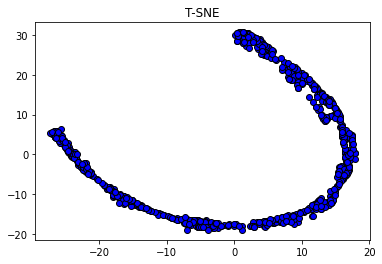

<Figure size 432x288 with 0 Axes>

In [ ]:
tydf = tydf.fillna(0)
X = tydf[x_categories].values
tsne = TSNE(n_components=2,random_state=1,verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
X_tsne = tsne.fit_transform(X)


plt.scatter(np.transpose(X_tsne)[0],np.transpose(X_tsne)[1],color='blue',edgecolors='black')
filename = "tsne.png"
plt.title("T-SNE")
plt.show()
plt.clf()


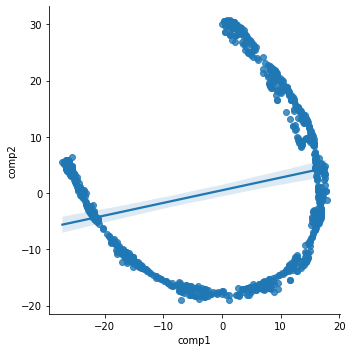

In [ ]:
df_tsne = pd.DataFrame(X_tsne, columns=['comp1', 'comp2'])
df_tsne['label'] = tydf['YEAR']

sns.lmplot(x='comp1', y='comp2', data=df_tsne, fit_reg=True)

#### Bars and beats occurences

In [ ]:
mlbb = []
all1bb=[]
for row in df.iloc[0]['BARS_START'].split('\n'):
    x1 = ' '.join(row.split('['))
    x2 = ' '.join(x1.split(']'))
    l1 = []
    for o in x2.split(' '):
        if o!='':
            l1.append(float(o))
            all1bb.append(float(o))
        
    mlbb.append(l1)

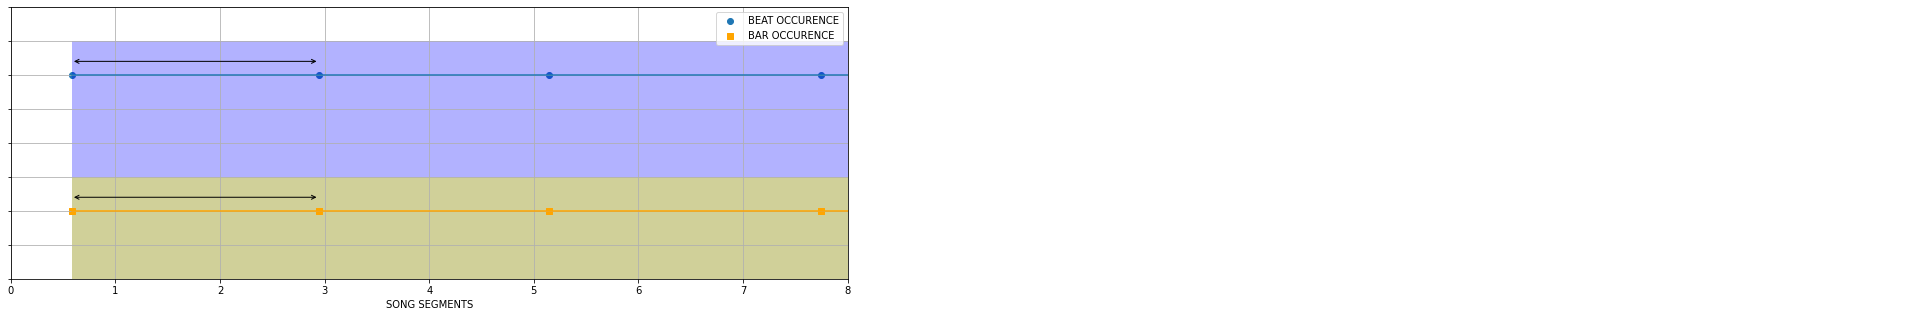

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(all1bb,[5 for _ in range(len(all1bb))])
plt.scatter(all1bb,[5 for _ in range(len(all1bb))],label='BEAT OCCURENCE')

plt.annotate('', xy=(all1bb[0],5.2), xytext=(all1bb[1],5.2), arrowprops=dict(arrowstyle='<->'))
plt.annotate('', xy=(all1bb[6],5.2), xytext=(all1bb[7],5.2), arrowprops=dict(arrowstyle='<->'))
plt.annotate('', xy=(all1bb[0],3.2), xytext=(all1bb[1],3.2), arrowprops=dict(arrowstyle='<->'))
plt.xlim(0,8)
plt.ylim(2,6)
plt.fill_between(all1bb, 0, 5.5,facecolor='b',alpha=0.3)
plt.fill_between(all1bb, 0, 3.5,facecolor='yellow',alpha = 0.4)
plt.scatter(all1bb,[3 for _ in range(len(all1bb))],marker='s',label='BAR OCCURENCE',color='orange')
plt.plot(all1bb,[3 for _ in range(len(all1bb))],color='orange')
plt.yticks(visible=False)
plt.xlabel("SONG SEGMENTS")
plt.grid()
plt.legend()

TRACK NUMBER :- 605 from year 2007.0
TRACK NUMBER :- 285 from year 2007.0
TRACK NUMBER :- 304 from year 2002.0
TRACK NUMBER :- 145 from year 2009.0
TRACK NUMBER :- 609 from year 2006.0


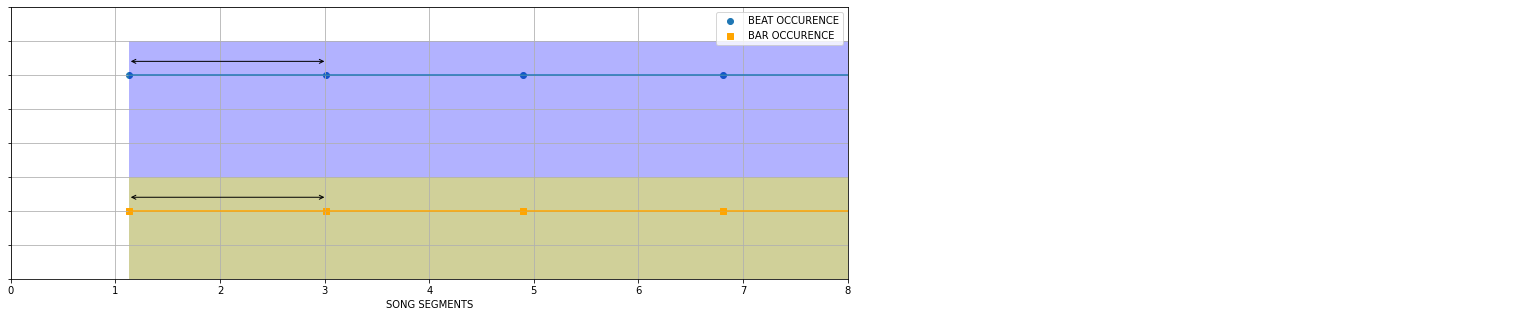

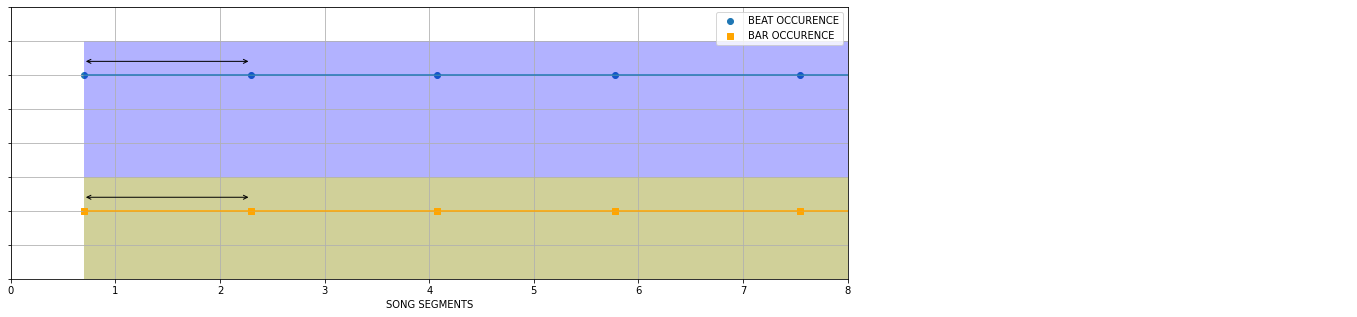

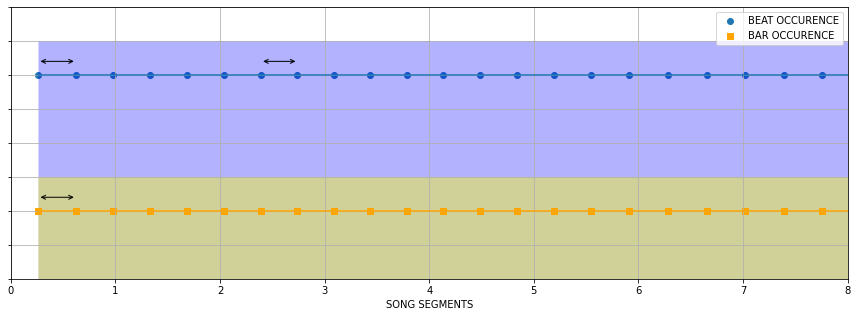

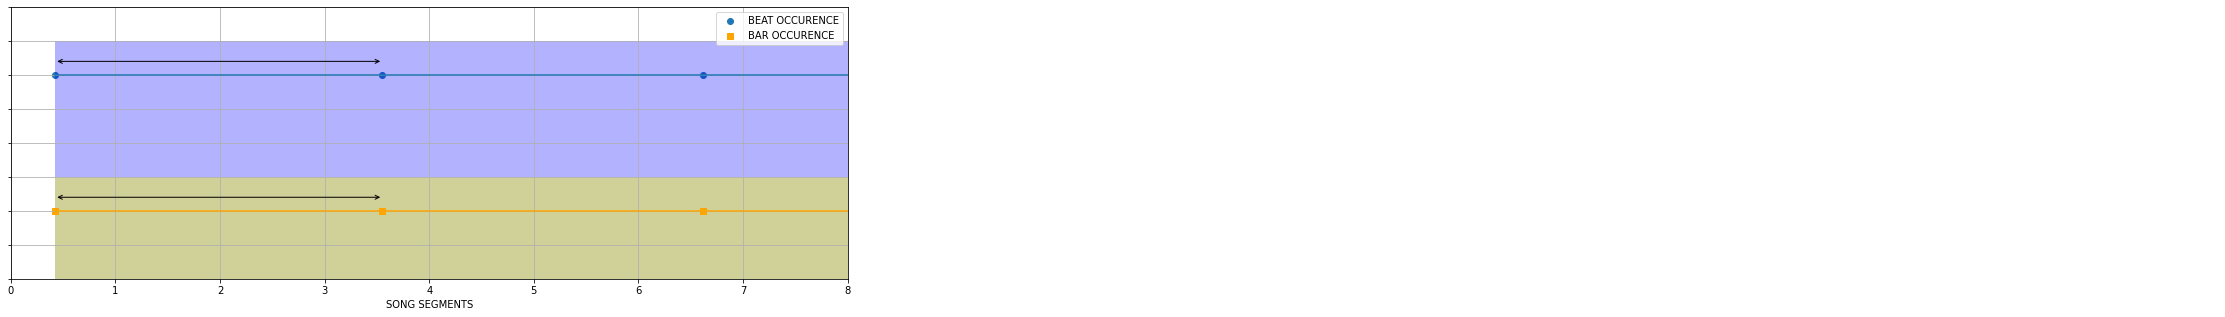

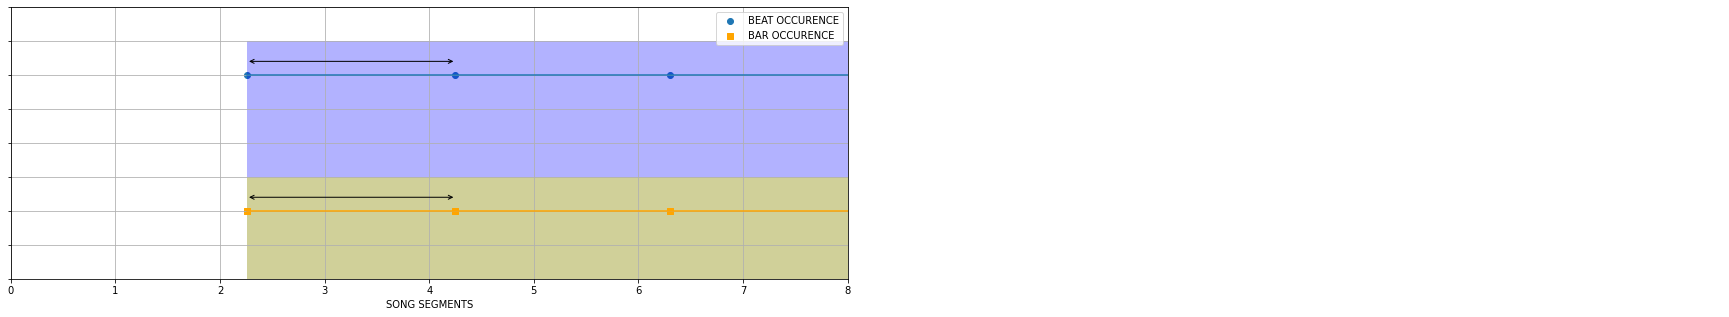

In [ ]:
#do this for randomly chosen 5 tracks
df = df.loc[df['YEAR']>= 1990]
for tmp_var in range(5):
  random_track = random.choice([o for o in range(len(df))])
  mlbb = []
  all1bb=[]
  print("TRACK NUMBER :- "+str(random_track+1)+" from year "+str(df.iloc[random_track]['YEAR']))
  for row in df.iloc[random_track]['BARS_START'].split('\n'):
      x1 = ' '.join(row.split('['))
      x2 = ' '.join(x1.split(']'))
      l1 = []
      for o in x2.split(' '):
          if o!='':
              l1.append(float(o))
              all1bb.append(float(o))
          
      mlbb.append(l1)

  
  plt.figure(figsize=(15,5))
  plt.plot(all1bb,[5 for _ in range(len(all1bb))])
  plt.scatter(all1bb,[5 for _ in range(len(all1bb))],label='BEAT OCCURENCE')

  plt.annotate('', xy=(all1bb[0],5.2), xytext=(all1bb[1],5.2), arrowprops=dict(arrowstyle='<->'))
  plt.annotate('', xy=(all1bb[6],5.2), xytext=(all1bb[7],5.2), arrowprops=dict(arrowstyle='<->'))
  plt.annotate('', xy=(all1bb[0],3.2), xytext=(all1bb[1],3.2), arrowprops=dict(arrowstyle='<->'))
  plt.xlim(0,8)
  plt.ylim(2,6)
  plt.fill_between(all1bb, 0, 5.5,facecolor='b',alpha=0.3)
  plt.fill_between(all1bb, 0, 3.5,facecolor='yellow',alpha = 0.4)
  plt.scatter(all1bb,[3 for _ in range(len(all1bb))],marker='s',label='BAR OCCURENCE',color='orange')
  plt.plot(all1bb,[3 for _ in range(len(all1bb))],color='orange')
  plt.yticks(visible=False)
  plt.xlabel("SONG SEGMENTS")
  plt.grid()
  plt.legend()
